<a href="https://colab.research.google.com/github/jlartey10/Time-Series-Forecasting/blob/master/GDELT_Stacked_LSTM_SWindow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from google.colab import files
uploaded = files.upload()

Saving LE1920_2021_Daily_ERC14_Count.xlsx to LE1920_2021_Daily_ERC14_Count.xlsx


In [3]:
LE_Daily = pd.read_excel("LE1920_2021_Daily_ERC14_Count.xlsx", index_col=0)  

In [4]:
LE_Daily

,"January 1, 1920","January 2, 1920","January 3, 1920","January 4, 1920","January 5, 1920","January 1, 2000","January 2, 2000","January 3, 2000","January 4, 2000","January 5, 2000","January 6, 2000","January 7, 2000","January 8, 2000","January 9, 2000","January 10, 2000","January 11, 2000","January 12, 2000","January 13, 2000","January 14, 2000","January 15, 2000","January 16, 2000","January 17, 2000","January 18, 2000","January 19, 2000","January 20, 2000","January 21, 2000","January 22, 2000","January 23, 2000","January 24, 2000","January 25, 2000","January 26, 2000","January 27, 2000","January 28, 2000","January 29, 2000","January 30, 2000","January 31, 2000","February 1, 2000","February 2, 2000","February 3, 2000","February 4, 2000",...,"November 22, 2020","November 23, 2020","November 24, 2020","November 25, 2020","November 26, 2020","November 27, 2020","November 28, 2020","November 29, 2020","November 30, 2020","December 1, 2020","December 2, 2020","December 3, 2020","December 4, 2020","December 5, 2020","December 6, 2020","December 7, 2020","December 8, 2020","December 9, 2020","December 10, 2020","December 11, 2020","December 12, 2020","December 13, 2020","December 14, 2020","December 15, 2020","December 16, 2020","December 17, 2020","December 18, 2020","December 19, 2020","December 20, 2020","December 21, 2020","December 22, 2020","December 23, 2020","December 24, 2020","December 25, 2020","December 26, 2020","December 27, 2020","December 28, 2020","December 29, 2020","December 30, 2020","December 31, 2020"
Event Root Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,128.0,265.0,346.0,222.0,109.0,40.0,34.0,120.0,66.0,54.0,16.0,38.0,20.0,26.0,20.0,50.0,52.0,76.0,36,10.0,44.0,60.0,42.0,30.0,44.0,10.0,38.0,8.0,26.0,22.0,20.0,16.0,16.0,14.0,66.0,114.0,62.0,34.0,12.0,34.0,...,41.0,43.0,38.0,60.0,33.0,43.0,17.0,28.0,43.0,36.0,78.0,54.0,64,30.0,25.0,35.0,46.0,57.0,62.0,55.0,25.0,28.0,70,70.0,54.0,59,48.0,34.0,23.0,59.0,35.0,43.0,32.0,22.0,28.0,37.0,79.0,71.0,38.0,35.0
2,50.0,108.0,119.0,77.0,54.0,12.0,12.0,14.0,18.0,26.0,16.0,18.0,12.0,10.0,14.0,44.0,28.0,30.0,8,2.0,10.0,12.0,8.0,6.0,24.0,20.0,2.0,10.0,NaN,22.0,12.0,NaN,12.0,6.0,26.0,82.0,22.0,10.0,38.0,20.0,...,13.0,17.0,20.0,38.0,14.0,36.0,17.0,10.0,31.0,30.0,31.0,35.0,28,21.0,11.0,19.0,20.0,19.0,30.0,26.0,29.0,12.0,23,25.0,27.0,28,25.0,28.0,17.0,29.0,12.0,21.0,29.0,21.0,8.0,30.0,33.0,27.0,25.0,8.0
3,58.0,77.0,90.0,75.0,21.0,16.0,12.0,14.0,4.0,40.0,2.0,30.0,10.0,16.0,12.0,32.0,26.0,46.0,82,34.0,38.0,32.0,18.0,38.0,32.0,14.0,8.0,8.0,58.0,6.0,22.0,4.0,8.0,2.0,32.0,42.0,36.0,36.0,30.0,34.0,...,11.0,36.0,26.0,33.0,19.0,27.0,11.0,9.0,23.0,37.0,50.0,45.0,22,21.0,13.0,36.0,28.0,31.0,47.0,31.0,14.0,11.0,21,43.0,33.0,41,20.0,11.0,12.0,12.0,26.0,19.0,28.0,36.0,12.0,31.0,26.0,25.0,38.0,12.0
4,295.0,625.0,738.0,458.0,266.0,42.0,68.0,156.0,88.0,90.0,62.0,156.0,76.0,40.0,66.0,130.0,186.0,64.0,116,88.0,98.0,102.0,106.0,50.0,106.0,48.0,66.0,36.0,130.0,118.0,138.0,58.0,88.0,84.0,202.0,204.0,162.0,42.0,104.0,126.0,...,57.0,97.0,150.0,128.0,109.0,90.0,48.0,42.0,124.0,132.0,238.0,147.0,105,50.0,50.0,117.0,156.0,90.0,182.0,57.0,45.0,32.0,137,123.0,132.0,203,98.0,81.0,39.0,55.0,155.0,116.0,94.0,99.0,62.0,78.0,189.0,96.0,89.0,56.0
5,51.0,109.0,126.0,65.0,33.0,48.0,10.0,28.0,30.0,60.0,10.0,38.0,26.0,6.0,50.0,54.0,24.0,28.0,40,40.0,14.0,26.0,34.0,48.0,12.0,44.0,34.0,24.0,34.0,32.0,10.0,14.0,6.0,14.0,30.0,34.0,26.0,6.0,18.0,30.0,...,24.0,35.0,28.0,45.0,22.0,43.0,28.0,12.0,28.0,35.0,57.0,65.0,39,20.0,33.0,39.0,38.0,21.0,44.0,36.0,35.0,27.0,39,32.0,30.0,30,14.0,10.0,9.0,22.0,53.0,33.0,23.0,32.0,11.0,11.0,39.0,31.0,19.0,20.0
6,14.0,14.0,24.0,9.0,4.0,24.0,4.0,6.0,NaN,2.0,NaN,2.0,NaN,10.0,4.0,2.0,4.0,NaN,14,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,2.0,8.0,8.0,NaN,12.0,6.0,NaN,8.0,16.0,NaN,NaN,4.0,...,3.0,9.0,7.0,18.0,11.0,7.0,3.0,7.0,4.0,10.0,11.0,10.0,5,5.0,2.0,10.0,10.0,6.0,4.0,13.0,3.0,1.0,14,9.0,3.0,22,6.0,NaN,3.0,7.0,29.0,9.0,6.0,11.0,4.0,7.0,8.0,7.0,8.0,4.0
7,35.0,

In [5]:
df_erc14 = LE_Daily.iloc[13].reset_index()



In [6]:

#Replace nan with 0

df_erc14 = df_erc14.replace(np.nan, 0)

In [7]:
df_erc14.isnull().values.any(), df_erc14.isnull().sum().sum()

(False, 0)

In [8]:
df_erc14

,index,14
0,"January 1, 1920",24.0
1,"January 2, 1920",28.0
2,"January 3, 1920",28.0
3,"January 4, 1920",30.0
4,"January 5, 1920",18.0
...,...,...
7671,"December 27, 2020",4.0
7672,"December 28, 2020",6.0
7673,"December 29, 2020",5.0
7674,"December 30, 2020",7.0


In [9]:
df_erc14['index']

0         January 1, 1920
1         January 2, 1920
2         January 3, 1920
3         January 4, 1920
4         January 5, 1920
              ...        
7671    December 27, 2020
7672    December 28, 2020
7673    December 29, 2020
7674    December 30, 2020
7675    December 31, 2020
Name: index, Length: 7676, dtype: object

In [10]:
df_erc14[14]

0       24.0
1       28.0
2       28.0
3       30.0
4       18.0
        ... 
7671     4.0
7672     6.0
7673     5.0
7674     7.0
7675     5.0
Name: 14, Length: 7676, dtype: float64

In [37]:
df2=df_erc14.reset_index()[14]
df2


df1=df_erc14
df1

0       0.120603
1       0.140704
2       0.140704
3       0.150754
4       0.090452
          ...   
7671    0.020101
7672    0.030151
7673    0.025126
7674    0.035176
7675    0.025126
Name: 14, Length: 7676, dtype: float64

,index,14
0,"January 1, 1920",0.120603
1,"January 2, 1920",0.140704
2,"January 3, 1920",0.140704
3,"January 4, 1920",0.150754
4,"January 5, 1920",0.090452
...,...,...
7671,"December 27, 2020",0.020101
7672,"December 28, 2020",0.030151
7673,"December 29, 2020",0.025126
7674,"December 30, 2020",0.035176


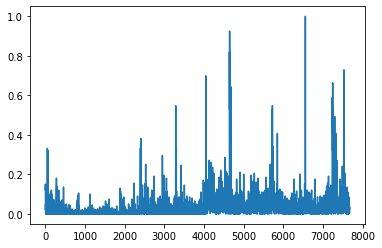

In [38]:
import matplotlib.pyplot as plt
plt.plot(df2)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler


In [13]:
import numpy as np

In [14]:
df1

,index,14
0,"January 1, 1920",24.0
1,"January 2, 1920",28.0
2,"January 3, 1920",28.0
3,"January 4, 1920",30.0
4,"January 5, 1920",18.0
...,...,...
7671,"December 27, 2020",4.0
7672,"December 28, 2020",6.0
7673,"December 29, 2020",5.0
7674,"December 30, 2020",7.0


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1_scale=scaler.fit_transform(np.array(df1[14]).reshape(-1,1))

df1[14] = df1_scale



from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))


In [44]:
print(df1)
df2

                  index        14
0       January 1, 1920  0.120603
1       January 2, 1920  0.140704
2       January 3, 1920  0.140704
3       January 4, 1920  0.150754
4       January 5, 1920  0.090452
...                 ...       ...
7671  December 27, 2020  0.020101
7672  December 28, 2020  0.030151
7673  December 29, 2020  0.025126
7674  December 30, 2020  0.035176
7675  December 31, 2020  0.025126

[7676 rows x 2 columns]


array([[0.12060302],
       [0.14070352],
       [0.14070352],
       ...,
       [0.02512563],
       [0.03517588],
       [0.02512563]])

In [49]:
df1 = df1.rename({'index': 'record_date', 14: 'event_root_code_14'}, axis='columns')

In [50]:
df1

,record_date,event_root_code_14
0,"January 1, 1920",0.120603
1,"January 2, 1920",0.140704
2,"January 3, 1920",0.140704
3,"January 4, 1920",0.150754
4,"January 5, 1920",0.090452
...,...,...
7671,"December 27, 2020",0.020101
7672,"December 28, 2020",0.030151
7673,"December 29, 2020",0.025126
7674,"December 30, 2020",0.035176


In [70]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	print("convert an array of values into a dataset matrix")
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		try:
			a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
			dataX.append(a)
			dataY.append(dataset[i + time_step, 0])
		except TypeError:
			print("Unexpected error:", sys.exc_info()[0])
			pass 
	return numpy.array(dataX), numpy.array(dataY)

In [52]:
import pandas as pd
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *

class TimeBasedCV(object):
    '''
    Parameters 
    ----------
    train_period: int
        number of time units to include in each train set
        default is 30
    test_period: int
        number of time units to include in each test set
        default is 7
    freq: string
        frequency of input parameters. possible values are: days, months, years, weeks, hours, minutes, seconds
        possible values designed to be used by dateutil.relativedelta class
        deafault is days
    '''
    
    
    def __init__(self, train_period=30, test_period=7, freq='days'):
        self.train_period = train_period
        self.test_period = test_period
        self.freq = freq

        
        
    def split(self, data, validation_split_date=None, date_column='record_date', gap=0):
        '''
        Generate indices to split data into training and test set
        
        Parameters 
        ----------
        data: pandas DataFrame
            your data, contain one column for the record date 
        validation_split_date: datetime.date()
            first date to perform the splitting on.
            if not provided will set to be the minimum date in the data after the first training set
        date_column: string, deafult='record_date'
            date of each record
        gap: int, default=0
            for cases the test set does not come right after the train set,
            *gap* days are left between train and test sets
        
        Returns 
        -------
        train_index ,test_index: 
            list of tuples (train index, test index) similar to sklearn model selection
        '''
        
        # check that date_column exist in the data:
        try:
            data[date_column]
        except:
            raise KeyError(date_column)
                    
        train_indices_list = []
        test_indices_list = []

        if validation_split_date==None:
            validation_split_date = data[date_column].min().date() + eval('relativedelta('+self.freq+'=self.train_period)')
        
        start_train = validation_split_date - eval('relativedelta('+self.freq+'=self.train_period)')
        end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
        start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
        end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        while end_test < data[date_column].max().date():
            # train indices:
            cur_train_indices = list(data[(data[date_column].dt.date>=start_train) & 
                                     (data[date_column].dt.date<end_train)].index)

            # test indices:
            cur_test_indices = list(data[(data[date_column].dt.date>=start_test) &
                                    (data[date_column].dt.date<end_test)].index)
            
            print("Train period:",start_train,"-" , end_train, ", Test period", start_test, "-", end_test,
                  "# train records", len(cur_train_indices), ", # test records", len(cur_test_indices))

            train_indices_list.append(cur_train_indices)
            test_indices_list.append(cur_test_indices)

            # update dates:
            start_train = start_train + eval('relativedelta('+self.freq+'=self.test_period)')
            end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
            start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
            end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        # mimic sklearn output  
        index_output = [(train,test) for train,test in zip(train_indices_list,test_indices_list)]

        self.n_splits = len(index_output)
        
        return index_output
    
    
    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits 

In [55]:
#type(df1['index'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7676 entries, 0 to 7675
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   record_date         7676 non-null   object 
 1   event_root_code_14  7676 non-null   float64
dtypes: float64(1), object(1)
memory usage: 120.1+ KB


In [56]:
# convert column to datetime pandas
df1['record_date'] = pd.to_datetime(df1['record_date'])

In [57]:
df1.event_root_code_14

0       0.120603
1       0.140704
2       0.140704
3       0.150754
4       0.090452
          ...   
7671    0.020101
7672    0.030151
7673    0.025126
7674    0.035176
7675    0.025126
Name: event_root_code_14, Length: 7676, dtype: float64

In [ ]:

# How to use TimeBasedCV

#Train model for 3 years (1095 days) and apply it to 1 year (365)
tscv = TimeBasedCV(train_period=1095,
                   test_period=365,
                   freq='days')


cvscores = []

split_count = 0


for train_index, test_index in tscv.split(df1, validation_split_date=datetime.date(2002,1,1), date_column='record_date'):
  split_count = split_count + 1
  print("split_count: ", split_count)

  # print("TRAIN:", train_index, "TEST:", test_index)
  # print(train_index, test_index)
  print("TRAIN Length:", len(train_index), "TEST Length:", len(test_index))




  # reshape into X=t,t+1,t+2,t+3 and Y=t+4
  time_step = 100
  X_train, y_train = create_dataset(df2[train_index], time_step)
  X_test, y_test = create_dataset(df2[train_index], time_step)


  print(X_train.shape), print(y_train.shape)
  print(X_test.shape), print(y_test.shape)
  


  # reshape input to be [samples, time steps, features] which is required for LSTM
  X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
  X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
  
  model=Sequential()
  model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
  model.add(LSTM(50,return_sequences=True))
  model.add(LSTM(50))
  model.add(Dense(1))
  # model.compile(loss='mean_squared_error',optimizer='adam')
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Fit the model
  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

  # evaluate the model
  scores = model.evaluate(X_test, y_test , verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)

Train period: 1999-01-02 - 2002-01-01 , Test period 2002-01-01 - 2003-01-01 # train records 731 , # test records 365
Train period: 2000-01-02 - 2003-01-01 , Test period 2003-01-01 - 2004-01-01 # train records 1095 , # test records 365
Train period: 2001-01-01 - 2004-01-01 , Test period 2004-01-01 - 2004-12-31 # train records 1095 , # test records 365
Train period: 2002-01-01 - 2004-12-31 , Test period 2004-12-31 - 2005-12-31 # train records 1095 , # test records 365
Train period: 2003-01-01 - 2005-12-31 , Test period 2005-12-31 - 2006-12-31 # train records 1095 , # test records 365
Train period: 2004-01-01 - 2006-12-31 , Test period 2006-12-31 - 2007-12-31 # train records 1095 , # test records 365
Train period: 2004-12-31 - 2007-12-31 , Test period 2007-12-31 - 2008-12-30 # train records 1095 , # test records 365
Train period: 2005-12-31 - 2008-12-30 , Test period 2008-12-30 - 2009-12-30 # train records 1095 , # test records 365
Train period: 2006-12-31 - 2009-12-30 , Test period 2009-

(None, None)

(630, 100)
(630,)


(None, None)

Epoch 1/100
63/63 [==============================] - 8s 78ms/step - loss: 0.1862 - accuracy: 0.5746
Epoch 2/100
63/63 [==============================] - 5s 78ms/step - loss: 0.1862 - accuracy: 0.5746
Epoch 3/100
63/63 [==============================] - 5s 77ms/step - loss: 0.1862 - accuracy: 0.5746
Epoch 4/100
63/63 [==============================] - 5s 78ms/step - loss: 0.1862 - accuracy: 0.5746
Epoch 5/100
63/63 [==============================] - 5s 79ms/step - loss: 0.1862 - accuracy: 0.5746
Epoch 6/100
63/63 [==============================] - 5s 79ms/step - loss: 0.1862 - accuracy: 0.5746
Epoch 7/100
63/63 [==============================] - 5s 78ms/step - loss: 0.1862 - accuracy: 0.5746
Epoch 8/100
63/63 [==============================] - 5s 78ms/step - loss: 0.1862 - accuracy: 0.5746
Epoch 9/100
63/63 [==============================] - 5s 78ms/step - loss: 0.1862 - accuracy: 0.5746
Epoch 10/100
63/63 [==============================] - 5s 78ms/step - loss: 0.1862 - accuracy: 0.5746

20/20 [==============================] - 2s 34ms/step - loss: 0.1862 - accuracy: 0.5746
accuracy: 57.46%
TRAIN Length: 1095 TEST Length: 365
convert an array of values into a dataset matrix
convert an array of values into a dataset matrix
(994, 100)
(994,)


(None, None)

(994, 100)
(994,)


(None, None)

Epoch 1/100
100/100 [==============================] - 15s 111ms/step - loss: 0.1460 - accuracy: 0.6177
Epoch 2/100
100/100 [==============================] - 11s 112ms/step - loss: 0.1460 - accuracy: 0.6177
Epoch 3/100
100/100 [==============================] - 11s 112ms/step - loss: 0.1460 - accuracy: 0.6177
Epoch 4/100
100/100 [==============================] - 11s 113ms/step - loss: 0.1460 - accuracy: 0.6177
Epoch 5/100
100/100 [==============================] - 11s 113ms/step - loss: 0.1460 - accuracy: 0.6177
Epoch 6/100
100/100 [==============================] - 11s 112ms/step - loss: 0.1460 - accuracy: 0.6177
Epoch 7/100
100/100 [==============================] - 11s 113ms/step - loss: 0.1460 - accuracy: 0.6177
Epoch 8/100
100/100 [==============================] - 11s 112ms/step - loss: 0.1460 - accuracy: 0.6177
Epoch 9/100
100/100 [==============================] - 11s 113ms/step - loss: 0.1460 - accuracy: 0.6177
Epoch 10/100
100/100 [==============================] - 11s 112m

32/32 [==============================] - 2s 32ms/step - loss: 0.1460 - accuracy: 0.6177
accuracy: 61.77%
TRAIN Length: 1095 TEST Length: 365
convert an array of values into a dataset matrix
convert an array of values into a dataset matrix
(994, 100)
(994,)


(None, None)

(994, 100)
(994,)


(None, None)

Epoch 1/100
100/100 [==============================] - 15s 109ms/step - loss: 0.0346 - accuracy: 0.6640
Epoch 2/100
100/100 [==============================] - 11s 108ms/step - loss: 0.0319 - accuracy: 0.6640
Epoch 3/100
100/100 [==============================] - 11s 108ms/step - loss: 0.0326 - accuracy: 0.6640
Epoch 4/100
100/100 [==============================] - 11s 109ms/step - loss: 0.0319 - accuracy: 0.6640
Epoch 5/100
100/100 [==============================] - 11s 109ms/step - loss: 0.0324 - accuracy: 0.6640
Epoch 6/100
100/100 [==============================] - 11s 109ms/step - loss: 0.0318 - accuracy: 0.6640
Epoch 7/100
100/100 [==============================] - 11s 108ms/step - loss: 0.0316 - accuracy: 0.6640
Epoch 8/100
100/100 [==============================] - 11s 108ms/step - loss: 0.0318 - accuracy: 0.6640
Epoch 9/100
100/100 [==============================] - 11s 109ms/step - loss: 0.0315 - accuracy: 0.6640
Epoch 10/100
100/100 [==============================] - 11s 108m

32/32 [==============================] - 3s 33ms/step - loss: 0.0777 - accuracy: 0.6640
accuracy: 66.40%
TRAIN Length: 1095 TEST Length: 365
convert an array of values into a dataset matrix
convert an array of values into a dataset matrix
(994, 100)
(994,)


(None, None)

(994, 100)
(994,)


(None, None)

Epoch 1/100
100/100 [==============================] - 15s 111ms/step - loss: 0.0640 - accuracy: 0.7113
Epoch 2/100
100/100 [==============================] - 11s 111ms/step - loss: 0.0640 - accuracy: 0.7113
Epoch 3/100
100/100 [==============================] - 11s 111ms/step - loss: 0.0640 - accuracy: 0.7113
Epoch 4/100
100/100 [==============================] - 11s 112ms/step - loss: 0.0640 - accuracy: 0.7113
Epoch 5/100
100/100 [==============================] - 11s 111ms/step - loss: 0.0640 - accuracy: 0.7113
Epoch 6/100
100/100 [==============================] - 11s 111ms/step - loss: 0.0640 - accuracy: 0.7113
Epoch 7/100
100/100 [==============================] - 11s 114ms/step - loss: 0.0640 - accuracy: 0.7113
Epoch 8/100
100/100 [==============================] - 11s 110ms/step - loss: 0.0640 - accuracy: 0.7113
Epoch 9/100
100/100 [==============================] - 11s 110ms/step - loss: 0.0640 - accuracy: 0.7113
Epoch 10/100
100/100 [==============================] - 11s 110m

32/32 [==============================] - 2s 35ms/step - loss: 0.0640 - accuracy: 0.7113
accuracy: 71.13%
TRAIN Length: 1095 TEST Length: 365
convert an array of values into a dataset matrix
convert an array of values into a dataset matrix
(994, 100)
(994,)


(None, None)

(994, 100)
(994,)


(None, None)

Epoch 1/100
100/100 [==============================] - 15s 111ms/step - loss: 0.0408 - accuracy: 0.6871
Epoch 2/100
100/100 [==============================] - 11s 111ms/step - loss: 0.0371 - accuracy: 0.6871
Epoch 3/100
100/100 [==============================] - 11s 111ms/step - loss: 0.0368 - accuracy: 0.6871
Epoch 4/100
100/100 [==============================] - 11s 110ms/step - loss: 0.0391 - accuracy: 0.6871
Epoch 5/100
100/100 [==============================] - 11s 110ms/step - loss: 0.0375 - accuracy: 0.6871
Epoch 6/100
100/100 [==============================] - 11s 110ms/step - loss: 0.0364 - accuracy: 0.6871
Epoch 7/100
100/100 [==============================] - 11s 112ms/step - loss: 0.0391 - accuracy: 0.6871
Epoch 8/100
100/100 [==============================] - 11s 110ms/step - loss: 0.0366 - accuracy: 0.6871
Epoch 9/100
100/100 [==============================] - 11s 111ms/step - loss: 0.0365 - accuracy: 0.6871
Epoch 10/100
100/100 [==============================] - 11s 110m

32/32 [==============================] - 2s 33ms/step - loss: 0.0961 - accuracy: 0.6871
accuracy: 68.71%
TRAIN Length: 1095 TEST Length: 365
convert an array of values into a dataset matrix
convert an array of values into a dataset matrix
(994, 100)
(994,)


(None, None)

(994, 100)
(994,)


(None, None)

Epoch 1/100
100/100 [==============================] - 16s 112ms/step - loss: 0.2419 - accuracy: 0.5543
Epoch 2/100
100/100 [==============================] - 11s 114ms/step - loss: 0.2419 - accuracy: 0.5543
Epoch 3/100
100/100 [==============================] - 11s 111ms/step - loss: 0.2419 - accuracy: 0.5543
Epoch 4/100
100/100 [==============================] - 11s 111ms/step - loss: 0.2419 - accuracy: 0.5543
Epoch 5/100
100/100 [==============================] - 11s 112ms/step - loss: 0.2419 - accuracy: 0.5543
Epoch 6/100
100/100 [==============================] - 11s 112ms/step - loss: 0.2419 - accuracy: 0.5543
Epoch 7/100
100/100 [==============================] - 11s 111ms/step - loss: 0.2419 - accuracy: 0.5543
Epoch 8/100
100/100 [==============================] - 11s 113ms/step - loss: 0.2419 - accuracy: 0.5543
Epoch 9/100
100/100 [==============================] - 11s 112ms/step - loss: 0.2419 - accuracy: 0.5543
Epoch 10/100
100/100 [==============================] - 11s 112m

In [72]:
tscv.get_n_splits()
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores))) 

19

33.00% (+/- 24.13%)


In [ ]:
import tensorflow as tf